In [ ]:
# !pip install imblearn

In [4]:
import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow import keras
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import BorderlineSMOTE

In [2]:
np_Images = np.load('./dataset/Image_224.npy') #converting the list of images to numpy array.
np_Labels = np.load('./dataset/Label_224.npy')

In [5]:
print("Shape of Images:",np_Images.shape)
print("Shape of Labels:",np_Labels.shape)

Shape of Images: (16785, 224, 224, 3)
Shape of Labels: (16785,)


In [6]:
np.bincount(np_Labels)

array([9955,  229,  766, 2061,  426, 3348])

In [7]:
len(np_Images)

16785

In [8]:
X_train_tmp, X_test, y_train_tmp, y_test = train_test_split(np_Images, np_Labels, test_size=0.1, random_state=1, stratify=np_Labels)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train_tmp, y_train_tmp, test_size=0.11, random_state=1 ,stratify=y_train_tmp)

In [10]:
np.bincount(y_train)

array([7973,  183,  613, 1651,  342, 2682])

In [11]:
len(X_train), len(y_train)

(13444, 13444)

In [ ]:
np.bincount(y_train)

In [12]:
X_train.shape, y_train.shape

((13444, 224, 224, 3), (13444,))

In [ ]:
# Images = (Images / 127.5) -1

In [13]:
np.bincount(y_train)

array([7973,  183,  613, 1651,  342, 2682])

In [12]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
np.bincount(y_train),np.bincount(y_test)

(13444, 224, 224, 3) (1679, 224, 224, 3) (13444,) (1679,)


(array([7973,  183,  613, 1651,  342, 2682]),
 array([996,  23,  77, 206,  42, 335]))

In [13]:
X_val.shape

(1662, 224, 224, 3)

In [14]:
IMG_SHAPE = X_train[0].shape
tf.keras.applications.
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                            include_top=False,   
                                            weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
base_model.trainable = False

In [16]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [56]:
test_batch = tf.convert_to_tensor(X_train[0:4].astype(np.float32))
test_batch

<tf.Tensor 'Const_4:0' shape=(4, 224, 224, 3) dtype=float32>

In [19]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    
    tf.keras.layers.Dense(6, activation='softmax'),
])

In [20]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(y_train),
#                                                  y_train)
# class_weights

In [13]:
# class_weight = {}

# for i in range(6):
#     class_weight[i] = class_weights[i]
    
# class_weight

In [14]:
# class_weight = [np.sqrt(np.sqrt(i)) for i in class_weights]
# class_weight

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 12294     
Total params: 23,600,006
Trainable params: 12,294
Non-trainable params: 23,587,712
_________________________________________________________________


In [63]:
model.trainable_variables

[<tf.Variable 'dense_2/kernel:0' shape=(1280, 6) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(6,) dtype=float32>]

In [22]:
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=False)]

In [23]:
# trained = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val,y_val))
trained = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_val,y_val), callbacks=callback)

Train on 13444 samples, validate on 1662 samples
Epoch 1/20
13444/13444 [==============================] - 48s 4ms/sample - loss: 0.7859 - acc: 0.7433 - val_loss: 1.0417 - val_acc: 0.6378
Epoch 2/20
13444/13444 [==============================] - 32s 2ms/sample - loss: 0.4398 - acc: 0.8677 - val_loss: 0.9154 - val_acc: 0.7383
Epoch 3/20
13444/13444 [==============================] - 32s 2ms/sample - loss: 0.3443 - acc: 0.8988 - val_loss: 0.9230 - val_acc: 0.7557
Epoch 4/20
13444/13444 [==============================] - 32s 2ms/sample - loss: 0.2874 - acc: 0.9152 - val_loss: 0.9484 - val_acc: 0.7503
Epoch 5/20
13444/13444 [==============================] - 32s 2ms/sample - loss: 0.2525 - acc: 0.9250 - val_loss: 0.9497 - val_acc: 0.7509
Epoch 6/20
13444/13444 [==============================] - 32s 2ms/sample - loss: 0.2310 - acc: 0.9322 - val_loss: 0.9332 - val_acc: 0.7575
Epoch 7/20
13444/13444 [==============================] - 32s 2ms/sample - loss: 0.2124 - acc: 0.9381 - val_loss: 0.9

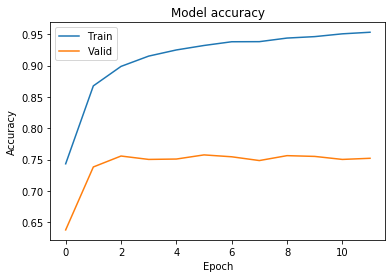

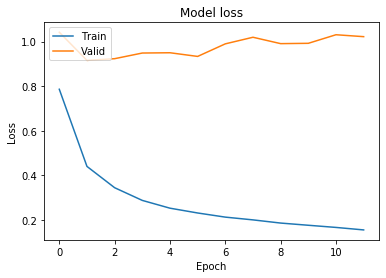

In [24]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Valid'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Valid'], loc='upper left')
plot.show()

In [66]:
# test_images,test_labels = get_images('./test/')
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)
model.evaluate(X_test,y_test, verbose=1)

1679/1679 [==============================] - 2s 926us/sample - loss: 2.6428 - acc: 0.5765


[2.642834586994928, 0.5765337]

In [72]:
pred = model.predict(X_test)

In [77]:
np.argmax(pred) == y_test

array([False, False, False, ..., False, False, False])

In [79]:
pred

array([[9.5468032e-01, 4.5938040e-03, 3.0107875e-04, 2.6386841e-03,
        3.3252377e-02, 4.5337472e-03],
       [9.2327142e-01, 5.2940566e-02, 1.8991600e-04, 1.5604980e-02,
        1.1084127e-03, 6.8847337e-03],
       [9.0756130e-01, 5.3119309e-02, 6.4173699e-05, 1.0635954e-02,
        2.7721234e-02, 8.9799898e-04],
       ...,
       [9.4056165e-01, 5.3682610e-02, 3.4572743e-04, 4.3894248e-03,
        8.7622080e-05, 9.3296042e-04],
       [9.6753627e-01, 2.4529943e-02, 2.2691005e-05, 6.6179624e-03,
        1.0288472e-03, 2.6431109e-04],
       [9.8387653e-01, 4.4093258e-03, 1.2903410e-05, 5.6873588e-03,
        1.0971356e-03, 4.9167252e-03]], dtype=float32)

In [21]:
model.save('97_2_per_mobilenet_v2.h5')